## CE888 Lab8 Recurrent Neural Netowork
**Date**: 4 March 2019

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.7'

In [2]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [3]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [5]:
# add ssl certificate module to load minst dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Using word-embeddings 

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17367040/17464789 [============================>.] - ETA: 0s25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [ ]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 47s - loss: 0.6595 - acc: 0.6008 - val_loss: 0.5220 - val_acc: 0.7942
Epoch 2/10
11648/20000 [================>.............] - ETA: 18s - loss: 0.4720 - acc: 0.8036

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig=plt.figure(figsize=(15,5))
for ev, val_ev, title, i in zip((acc, loss), (val_acc, val_loss), ("acc","loss"), (1,2)): 
    plt.subplot(1, 2, i)
    plt.plot(epochs, ev, 'bo', label='Training %s'% title)
    plt.plot(epochs, val_ev, 'b', label='Validation %s'% title)
    plt.title('Training and validation %s'% title)
    plt.legend('best')
    
#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

#plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()

fig.show()

### Training the model with Embedding and SimpleRNN layers

In [60]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 52s - loss: 0.5135 - acc: 0.7563 - val_loss: 0.3821 - val_acc: 0.8474
Epoch 2/10
20000/20000 [==============================] - 52s - loss: 0.3010 - acc: 0.8785 - val_loss: 0.3629 - val_acc: 0.8438
Epoch 3/10
20000/20000 [==============================] - 52s - loss: 0.2336 - acc: 0.9102 - val_loss: 0.4109 - val_acc: 0.8614
Epoch 4/10
20000/20000 [==============================] - 52s - loss: 0.2016 - acc: 0.9250 - val_loss: 0.3087 - val_acc: 0.8708
Epoch 5/10
20000/20000 [==============================] - 52s - loss: 0.1752 - acc: 0.9381 - val_loss: 0.2987 - val_acc: 0.8834
Epoch 6/10
20000/20000 [==============================] - 53s - loss: 0.1555 - acc: 0.9433 - val_loss: 0.3242 - val_acc: 0.8672
Epoch 7/10
20000/20000 [==============================] - 52s - loss: 0.1422 - acc: 0.9498 - val_loss: 0.3584 - val_acc: 0.8806
Epoch 8/10
20000/20000 [==============================]

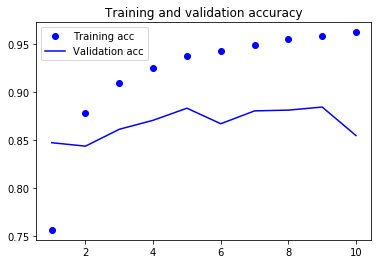

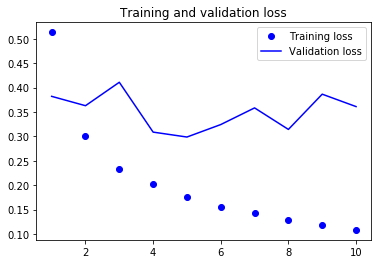

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()